In [1]:
# imports
import sys, os
sys.path.append("../../src")

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

from surface import *
from source import *
from simulator import *
from focus import *
from terrain import *
from util import *

GPU's detected. Enabling CUDA compute


In [2]:
# generate linspace of sources
ss = source_linspace('x', -10e3, 20e3, 5050, 25e3, 500, 9e6, 1e6)
#ss = source_linspace('x', 4000, 6000, 5050, 25e3, 5, 9e6, 1e6)

# target location
t = (5000, 5050, -1000)   # target location (x, y, z)

par = {
    'surf_gain':81,
    'rx_window_offset':22.5e3,
    'rx_window_m':10e3,
    'aspect':0.5
}

In [3]:
# terrain extent
xmin, xmax = -11e3, 21e3
ymin, ymax =  3.9e3, 6.1e3

# facet
fs   = 5
dims = (400, 400)

# make terrain object
terrain = Terrain(xmin, xmax, ymin, ymax, fs)
terrain.gen_flat(0)

# attenuation field params
zmin, zmax = -1000, 0
atten_disc = 50
split      = 5e3

atten = split_attenuation_field_x(xmin, xmax, ymin, ymax, zmin, zmax, atten_disc, split)

In [4]:
rdrgrm, time = run_sim_terrain(terrain, dims, ss, t, atten=atten, reflect=True, polarization='v', sltrng=False, pt_response="gaussian", show=False, par=par, nsmpl=1601)

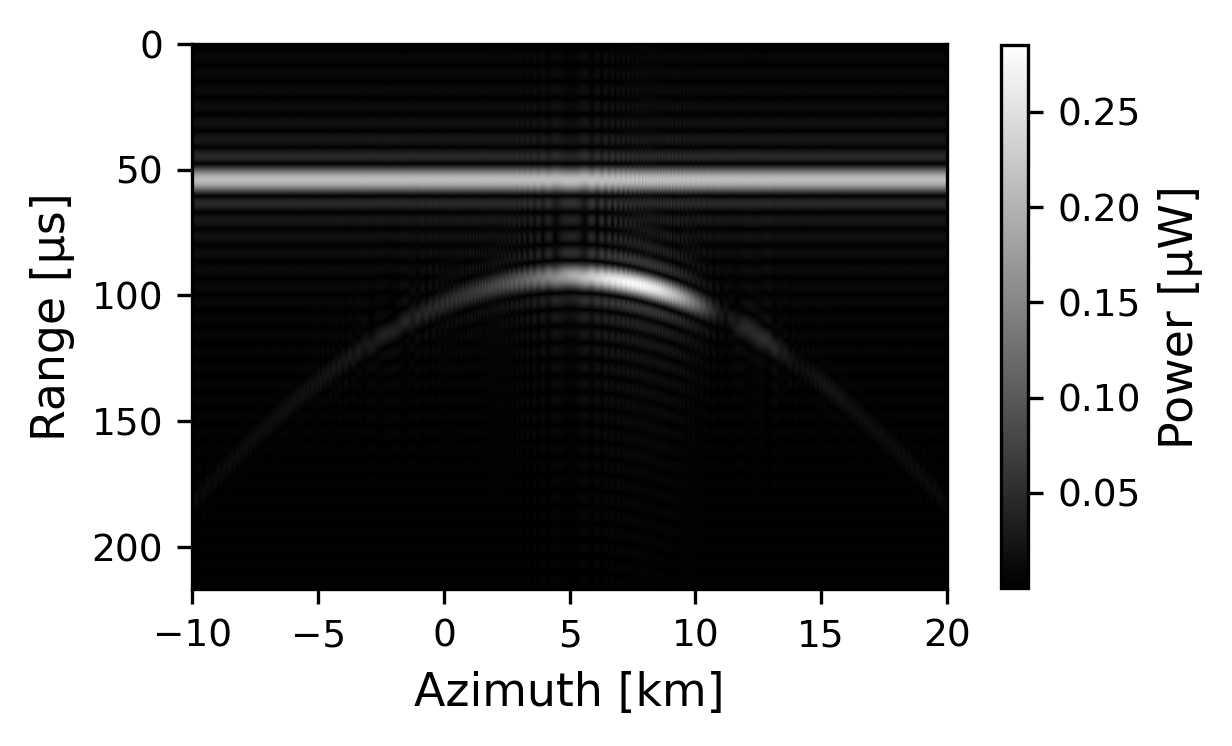

In [5]:
extent = (-10, 20, 2*((par['rx_window_offset'] + par['rx_window_m'])/299.792458e6)*10**6, 2*(par['rx_window_offset']//299.792458e6)*10**6) 
fig, ax = plt.subplots(1, 1, figsize=(4, 3), constrained_layout=True, dpi=300)
im0 = ax.imshow(np.abs(rdrgrm)*1e6, cmap="gray", aspect=par['aspect']*0.2, extent=extent) 

ax.set_ylabel("Range [µs]", fontsize=11) 
ax.tick_params(axis="both", which="major", labelsize=9, direction="out") 
ax.tick_params(axis="both", which="minor", direction="out")  
ax.set_xlabel("Azimuth [km]", fontsize=11) 

cbar = fig.colorbar(im0, ax=ax, orientation="vertical", fraction=0.036, pad=0.04) 
cbar.set_label("Power [µW]", fontsize=11) 
cbar.ax.tick_params(labelsize=9) 
plt.savefig("DramaticAttenuationField.png")
plt.show()
plt.close()